In [35]:
# Import Modules
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
from pathlib import Path
import matplotlib.pyplot as plt
import math
import hvplot.pandas

In [36]:
# Set paths to csv files
call_volume = Path("./data/Call_Volume_20211102.csv")
prices = Path("./data/Stock_Prices_20211102.csv")
put_volume = Path("./data/Put_Volume_20211102.csv")
SPY_prices = Path("./data/SPY_Price_20211102.csv")
short_interest = Path("./data/Short_Interest_20211102.csv")
sub_sectors = Path("./data/Subsectors_20211102.csv")
all_sectors = Path("./data/Sectors_20211102.csv")


In [37]:
# Read in csv files
call_volume_df = pd.read_csv(
    call_volume, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

price_df = pd.read_csv(
    prices, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

put_volume_df = pd.read_csv(
    put_volume, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

SPY_prices_df = pd.read_csv(
    SPY_prices, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

short_interest_df = pd.read_csv(
    short_interest, 
    index_col="date", 
    infer_datetime_format=True, 
    parse_dates=True
)

sub_sectors_df = pd.read_csv(
    sub_sectors
)

all_sectors_df = pd.read_csv(
    all_sectors
)




In [38]:
# Calculate the 60d trailing volue and daily percent changes
sixty_day_rolling_volume_df = call_volume_df.rolling(60).mean()
pct_change_one_day = price_df.pct_change()




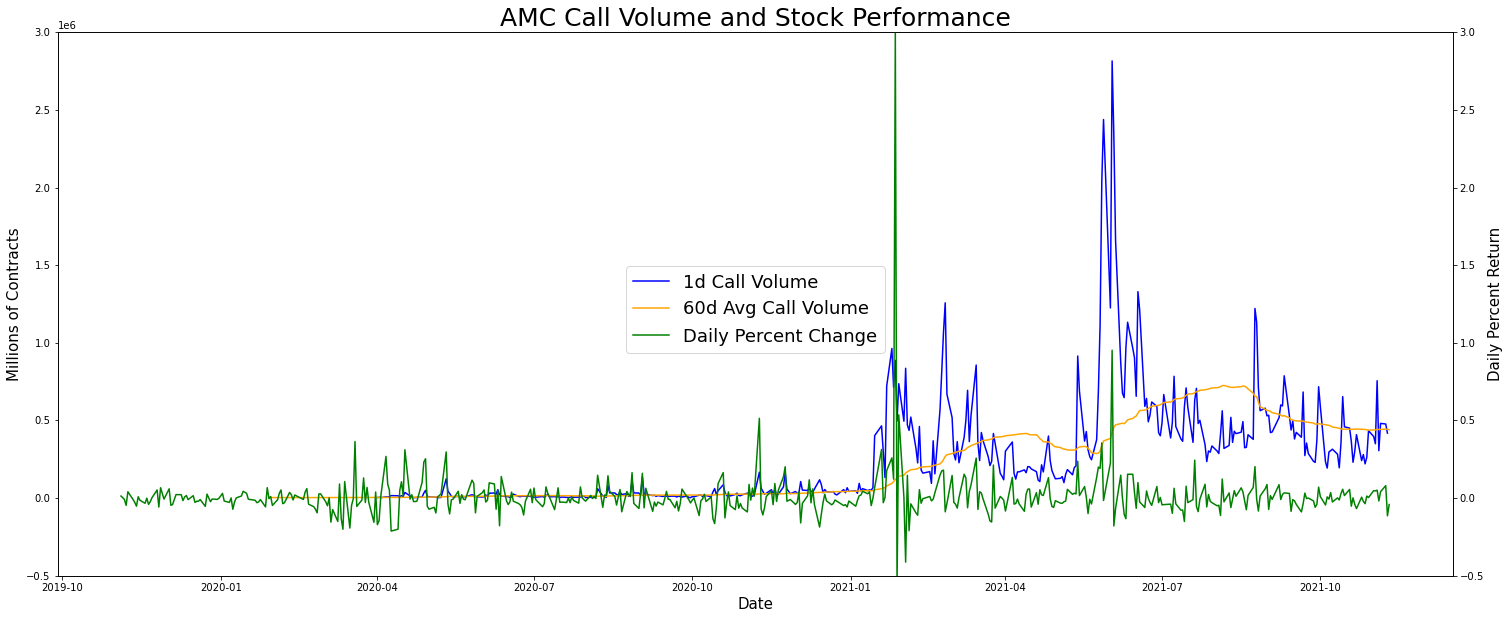

In [57]:
#Single Stock Call Volume Chart Example
fig, ax1 = plt.subplots(figsize=(25,10))

ax1.plot(call_volume_df['AMC'], label="1d Call Volume", color="blue")
ax1.plot(sixty_day_rolling_volume_df["AMC"], label="60d Avg Call Volume", color="orange")
ax1.set_xlabel("Date", fontsize=15)
ax1.set_ylabel("Millions of Contracts", fontsize=15)
ax1.set_ylim([-500000,3000000])

ax2 = ax1.twinx()
ax2.set_ylim([-0.5,3])
ax2.plot(pct_change_one_day['AMC'],color="green", label="Daily Percent Change")
ax2.set_ylabel("Daily Percent Return", fontsize=15)

plt.title("AMC Call Volume and Stock Performance",fontsize=25)
fig.legend(fontsize=18, loc="center")



In [44]:
#Set start date and end date.  Dates chosen to start post Covid and until when we created file
start_date = "2020-04-01"
end_date = "2021-11-09"

call_volume_df = call_volume_df.loc[start_date:end_date]
put_volume_df = put_volume_df.loc[start_date:end_date]
SPY_prices_df = SPY_prices_df.loc[start_date:end_date]
price_df = price_df.loc[start_date:end_date]

display(SPY_prices_df.head())

,SPY
date,
2020-04-01,240.7032
2020-04-02,246.2575
2020-04-03,242.6981
2020-04-06,258.9992
2020-04-07,259.2632


In [7]:
#Inputs

# nDay Return
shift = 3
# Call/Put Ratio Threshold
call_put_ratio_threshold = 2
# Multiple of Avg Dailiy Vol
adv_multiple = 4 
# Short intereset threshold
short_interest_threshold = 20
# Sector Selection
filter_input_sector = "Entire Market"


In [8]:
#Generating new dataframe for 60d rolling variance for SPY
spy_pct_change = SPY_prices_df.pct_change()
spy_roll_var = spy_pct_change.rolling(60).var()
#Generating new dataframe for 60d rolling covariance
rolling_cov = pct_change_one_day.rolling(60).cov(spy_pct_change['SPY'])
rolling_beta = rolling_cov.copy()

#Calculating rolling 60d betas for each ticker
for ticker in rolling_cov:
    rolling_beta[ticker] = rolling_cov[ticker]/spy_roll_var['SPY']

rolling_beta

,AAPL,AAL,CCL,CMCSA,MU,CLF,TSLA,NIO,FCX,GE,...,RADA,LL,DBI,DOLE,SYK,GDOT,RL,SUMO,CNDT,IO
date,,,,,,,,,,,,,,,,,,,,,
2019-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-04,1.347630,0.727071,0.903981,1.153245,0.938497,1.372048,1.038647,1.728953,2.099959,1.135526,...,0.632428,0.517738,1.595351,-0.699301,1.075653,1.003530,1.157535,1.736909,1.604470,0.387132
2021-11-05,1.335517,0.799877,0.990401,1.171778,0.988717,1.378887,1.017389,1.734758,2.105326,1.159496,...,0.647324,0.560696,1.613103,-0.699707,1.084628,0.993661,1.169917,1.723962,1.471953,0.435621
2021-11-08,1.335679,0.808639,0.997567,1.170382,0.985918,1.376156,1.023631,1.744884,2.106719,1.164451,...,0.650272,0.567655,1.621627,-0.710423,1.082746,0.993656,1.169679,1.730846,1.465075,0.446802


In [9]:
#Incorporating the n-day return shift to calc daily period returns
shift_amt = shift * -1
shifted = price_df.shift(periods=shift_amt, axis="rows")
period_day_return = shifted/price_df-1

ticker_names = list(period_day_return)

#defining trailing 60d volume df and the volume threshold
trailing_sixty_day = sixty_day_rolling_volume_df.shift(periods=-1, axis="rows")
volume_indicator = adv_multiple * trailing_sixty_day

#starting with empty dictionaries
good_vol_signal = {}
no_vol_signal = {}

#creating the dictionary with the key being the ticker and the value being a list of triggered dates
for ticker in ticker_names:
    i = 0
    good_vol_signal[ticker] = []
    no_vol_signal[ticker] = []

    for value in call_volume_df[ticker]:
        date = call_volume_df.index[i]
        if(value > volume_indicator[ticker][i]):
            good_vol_signal[ticker].append(date)
        else:
            no_vol_signal[ticker].append(date)
        i+= 1



In [10]:
#Calculating Call / Put Ratio
call_put_ratio = call_volume_df / put_volume_df


In [11]:
#Creating empty dictionaries for call put ratio signal
good_ratio_signal = {}
no_ratio_signal = {}

#Creating dictionary for call put ratio signal
for ticker in ticker_names:
    i = 0
    good_ratio_signal[ticker] = []
    no_ratio_signal[ticker] = []

    for ratio in call_put_ratio[ticker]:
        date = call_put_ratio.index[i]
        if(ratio > call_put_ratio_threshold):
            good_ratio_signal[ticker].append(date)
        else:
            no_ratio_signal[ticker].append(date)
        i+= 1

In [12]:
#Starting with empty dictionaries
good_final_signal = {}
no_final_signal = {}

#Defining intersection function
def intersection (lst1, lst2):
    return list (set(lst1) & set(lst2))

#Creating final signal date list within dictionaries
for ticker in ticker_names:
    good_final_signal[ticker] = intersection(good_vol_signal[ticker], good_ratio_signal[ticker])

In [13]:
#Testing the overall signal list creation
good_final_signal["AMC"]

[Timestamp('2021-03-31 00:00:00'),
 Timestamp('2021-04-05 00:00:00'),
 Timestamp('2021-05-17 00:00:00'),
 Timestamp('2021-01-21 00:00:00'),
 Timestamp('2021-03-11 00:00:00'),
 Timestamp('2020-08-13 00:00:00'),
 Timestamp('2020-08-24 00:00:00'),
 Timestamp('2020-09-02 00:00:00'),
 Timestamp('2021-01-14 00:00:00'),
 Timestamp('2021-05-14 00:00:00'),
 Timestamp('2021-03-19 00:00:00'),
 Timestamp('2021-05-20 00:00:00'),
 Timestamp('2020-08-26 00:00:00'),
 Timestamp('2021-02-19 00:00:00'),
 Timestamp('2021-03-18 00:00:00'),
 Timestamp('2021-05-21 00:00:00'),
 Timestamp('2020-08-07 00:00:00'),
 Timestamp('2021-04-14 00:00:00'),
 Timestamp('2021-05-04 00:00:00'),
 Timestamp('2021-03-05 00:00:00'),
 Timestamp('2020-08-21 00:00:00'),
 Timestamp('2021-03-09 00:00:00'),
 Timestamp('2020-10-16 00:00:00'),
 Timestamp('2021-02-25 00:00:00'),
 Timestamp('2021-04-13 00:00:00'),
 Timestamp('2020-10-19 00:00:00'),
 Timestamp('2021-02-23 00:00:00'),
 Timestamp('2021-01-22 00:00:00'),
 Timestamp('2021-05-

In [14]:
#Creating the list of dates for when the signal was not triggered (one or zero of the signal was triggered but not both)

for ticker in ticker_names:
    no_final_signal[ticker] = no_vol_signal[ticker] + no_ratio_signal[ticker]


In [15]:

#Creating SPY n-day returns
spy_shifted = SPY_prices_df.shift(periods=shift_amt, axis="rows")
spy_period_day_return = spy_shifted/SPY_prices_df-1

#Calculating beta-adjusted outperformance as stock return minus beta * SPY return

beta_adj_outperf = period_day_return.copy()
for ticker in ticker_names:
    beta_adj_outperf[ticker] = period_day_return[ticker] - (spy_period_day_return['SPY'] * rolling_beta[ticker])

display(beta_adj_outperf)

,AAPL,AAL,CCL,CMCSA,MU,CLF,TSLA,NIO,FCX,GE,...,RADA,LL,DBI,DOLE,SYK,GDOT,RL,SUMO,CNDT,IO
date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-03,-0.017790,0.071849,0.052857,-0.000379,0.038137,0.028848,-0.051294,0.025710,0.011862,0.012712,...,0.024830,-0.038993,-0.023312,-0.044963,0.003634,-0.014365,0.038497,-0.015012,-0.156751,-0.267489
2021-11-04,-0.000892,0.078279,0.055471,0.018183,0.045428,0.021613,-0.168871,-0.059254,0.057346,0.056646,...,0.033979,-0.012194,0.016576,0.024756,0.017839,-0.013356,0.037111,0.015593,-0.139595,-0.068351
2021-11-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#To see outlier returns
beta_adj_outperf.describe().transpose()['max'].dropna().sort_values()

WEBR     0.001921
DOLE     0.024756
CCV      0.030472
ALTU     0.032874
PG       0.039150
          ...    
BNGO     4.413574
AMC      4.729029
WIMI     6.070101
OCGN     7.861733
KODK    14.788829
Name: max, Length: 1190, dtype: float64

In [17]:
#Aggreating returns for when signals were triggered and not triggered
good_signal_returns = {}
no_signal_returns = {}

for ticker in ticker_names:
    good_signal_returns[ticker] = []
    no_signal_returns[ticker] = []
    for date in good_final_signal[ticker]:
        change = beta_adj_outperf.loc[date][ticker]
        good_signal_returns[ticker].append(change)
    for date in no_final_signal[ticker]:
        change = beta_adj_outperf.loc[date][ticker]
        no_signal_returns[ticker].append(change)
      
    

In [18]:
#Calculating number of observations for signal triggered
total=0
for ticker in ticker_names:
    total = total + len(good_signal_returns[ticker])
print(total)

19661


In [19]:
totalno=0
for ticker in ticker_names:
    totalno = totalno + len(no_signal_returns[ticker])
print(totalno) 

696803


In [20]:
#Employing short interest filter
short_interest_max  = {}
for ticker in short_interest_df:
    short_interest_max[ticker] = short_interest_df[ticker].max()

filtered_short_interest = []
for ticker in short_interest_max:
    if(short_interest_max[ticker] > short_interest_threshold):
        filtered_short_interest.append(ticker)

len(filtered_short_interest)

286

In [21]:
#Employing sector selection filter
all_sector_names = all_sectors_df['value']
all_sectors_unique = all_sector_names.unique()
all_sectors_unique

array(['Materials', 'Financials', 'Consumer Discretionary',
       'Information Technology', 'Industrials', 'Communication Services',
       'Health Care', 'Consumer Staples', 'Energy', 'Utilities',
       'Real Estate', nan], dtype=object)

In [22]:

if(filter_input_sector != "Entire Market"):
    filtered_tickers_df = all_sectors_df[all_sectors_df.value == filter_input_sector]
    sector_filtered_list = filtered_tickers_df['ticker'].tolist(),
else:
    sector_filtered_list = ticker_names
    
    


In [23]:
#Creating final list of returns for statistical analysis
good_signal_returns_list = []

#Using filters to create list of subset of tickers based on user inputs
filtered_ticker_names = intersection(sector_filtered_list, filtered_short_interest)

len(filtered_ticker_names)

286

In [24]:
for ticker in filtered_ticker_names:
    good_signal_returns_list = good_signal_returns_list + good_signal_returns[ticker]

no_signal_returns_gross_list = []
for ticker in filtered_ticker_names:
    no_signal_returns_gross_list = no_signal_returns_gross_list  + no_signal_returns[ticker]
no_signal_returns_list = [x for x in no_signal_returns_gross_list if np.isnan(x) == False]
len(no_signal_returns_list)


good_signal_returns_list = [x for x in good_signal_returns_list if math.isnan(x) == False]

In [25]:

#Converting final list of BAO into dataframe
good_signal_returns_list_df = pd.DataFrame(good_signal_returns_list, columns=['Beta-Adjusted Outperformance Returns'])



#Plotting histogram
good_signal_returns_list_df.hvplot.hist(bins=700, xlim=(-1,2), title="Frequency of Outperformance Returns in Signalled Dates")




:Histogram   [Beta-Adjusted Outperformance Returns]   (Beta-Adjusted Outperformance Returns_count)

In [26]:
good_signal_returns_list_df.describe().transpose()['mean']

Beta-Adjusted Outperformance Returns    0.012206
Name: mean, dtype: float64

In [27]:
good_signal_returns_list_df.describe()

,Beta-Adjusted Outperformance Returns
count,5737.000000
mean,0.012206
std,0.178137
min,-0.567349
25%,-0.061170
50%,-0.006974
75%,0.054322
max,4.729029


In [28]:
no_signal_returns_list_df = pd.DataFrame(no_signal_returns_list)
no_signal_returns_list_df.columns = ["Beta-Adjusted Outperformance Returns"]
no_signal_returns_list_df.hvplot.hist(bins=700, xlim=(-1,2), title="Frequency of Outperformance Returns in Control Dates")

:Histogram   [Beta-Adjusted Outperformance Returns]   (Beta-Adjusted Outperformance Returns_count)

In [29]:
no_signal_returns_list_df.describe().transpose()['mean']

Beta-Adjusted Outperformance Returns    0.003807
Name: mean, dtype: float64

In [30]:
#To see variance of signalled returns
print(np.var(good_signal_returns_list))

0.03172729469097327


In [31]:
#To see variance of control returns
print(np.var(no_signal_returns_list))

0.016660513369076767


In [58]:
#T-test
tt, pvalue = ttest_ind(a=good_signal_returns_list, b=no_signal_returns_list, equal_var=True)
display(f"The T-stat is {tt :.2f}")
display(f"The p-value is {100*pvalue :.4f}%")

'The T-stat is 4.71'

'The p-value is 0.0003%'

In [33]:
np.mean(good_signal_returns_list)

0.012206313759862478

In [34]:
np.mean(no_signal_returns_list)

0.0038073723057255246